In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Generate continuous random dataset for the problem of X = study hours and Y = grade of students (if you study more, you will get a higher grade).

In [2]:
def make_data(n):
  x = np.random.uniform(size=(n,1))*8
  e = np.random.normal(0, 1, size=x.shape)
  y = (2.5*x ) + e
  return (x,y)

[20.02579229]


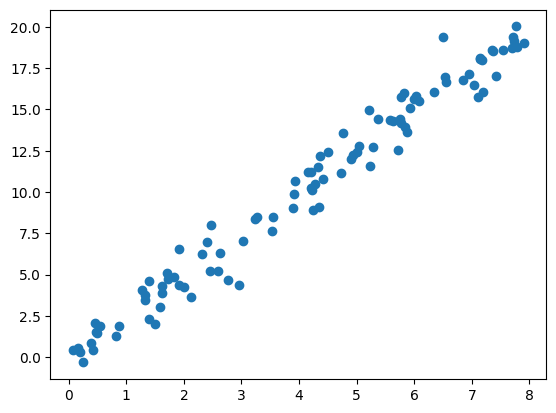

In [3]:
x,y = make_data(100)
print(max(y))
fig, ax = plt.subplots(dpi=100)
plt.scatter(x,y)

## 2. Split your dataset to train and test with train_test_split function.

In [4]:
X_train, X_test,Y_train, Y_test=train_test_split(x,y,test_size=0.2)

## 3. Draw some wrong red lines with a random slope

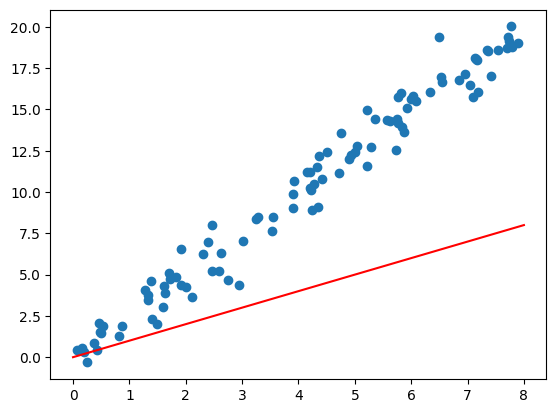

In [5]:
xx=np.linspace(0,8,20)

plt.scatter(x,y)
plt.plot(xx,xx,color='red')
plt.show()

## 4. Draw the correct blue line using your Object Oriented Linear Least Squares (LLS) method.

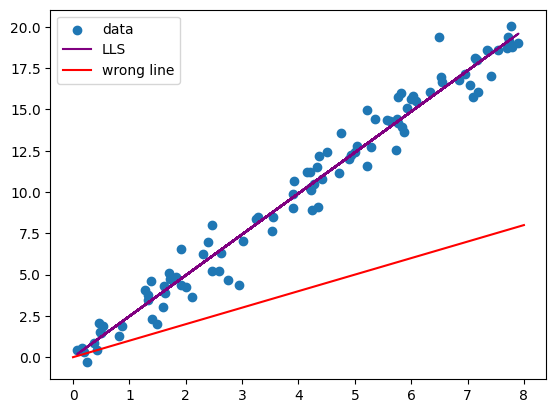

In [6]:
from lls_class import LLS

lls=LLS()
w=lls.fit(np.array(X_train),np.array(Y_train))

plt.scatter(x,y,label='data')
plt.plot(x,x*w,color='purple',label='LLS')
plt.plot(xx,xx,color='red',label='wrong line')
plt.legend()
plt.show()

## 5. Draw a green line using linregress from scipy library. Compare your result with scipy's result.

[-0.08569658  2.49443847]


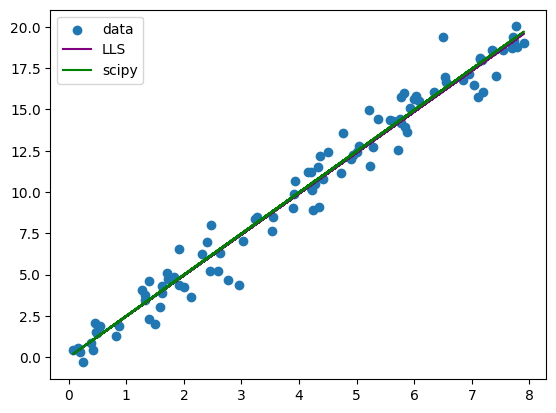

In [7]:
from scipy.linalg import lstsq
X=X_train
Y=Y_train
X=X.reshape(-1)
Y=Y.reshape(-1)

M = X[:, np.newaxis]**[0, 1]

p, res, rnk, s = lstsq(M, Y)
print(p)


plt.scatter(x,y,label='data')
plt.plot(x,x*w,color='purple',label='LLS')
plt.plot(X,X*p[1],color='green',label='scipy')
plt.legend()
plt.show()